In [1]:
options(warn=-1)

In [54]:
library(e1071)
library(ROCR)
library(ISLR)

# Support Vector Classifier

In [5]:
set.seed(1)
x = matrix(rnorm(20 * 2), ncol = 2)
y = c(rep(-1, 10), rep(1, 10))
x[y == 1,] = x[y == 1,] + 1

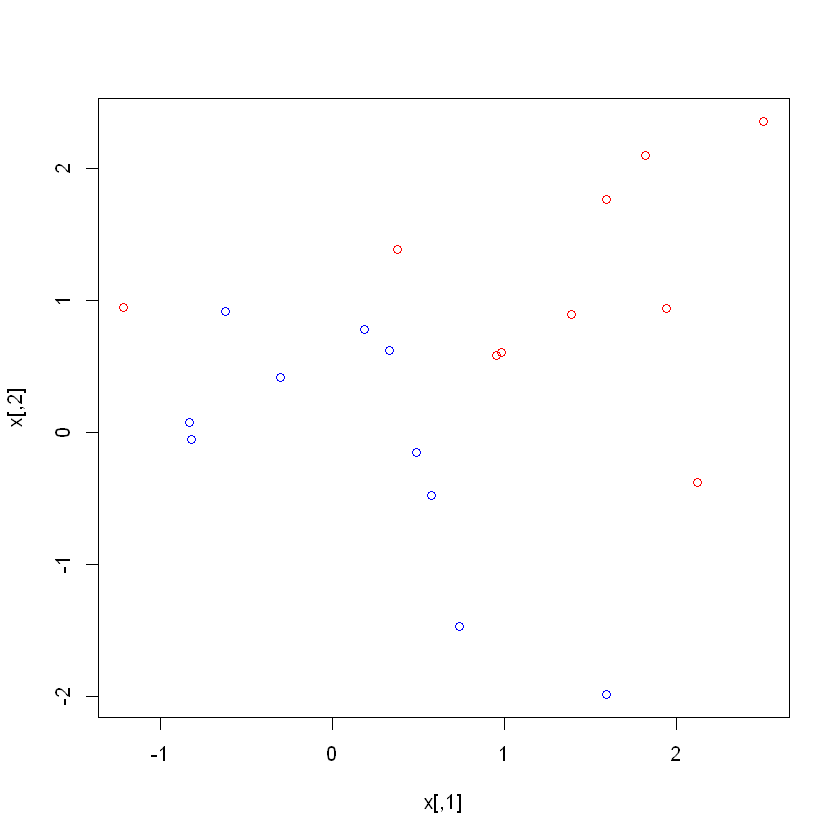

In [6]:
plot(x, col = 3 - y)

In [7]:
dat = data.frame(x = x, y = as.factor(y))
svmfit = svm(y ~ ., data = dat, kernel = 'linear', cost = 10, scale = FALSE)

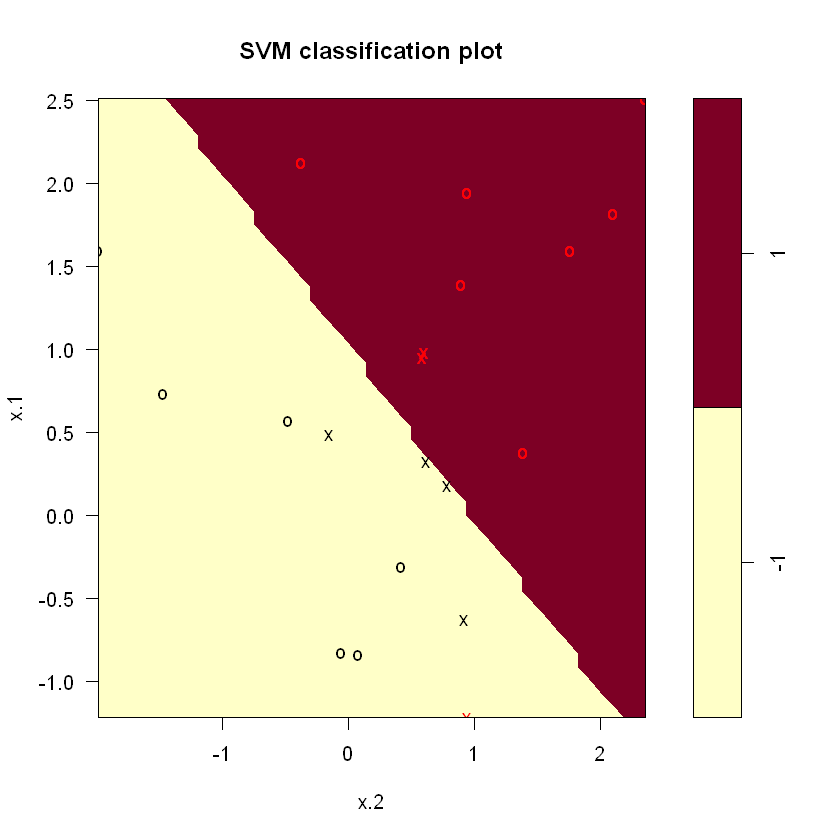

In [8]:
plot(svmfit, dat)

In [12]:
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 0.1, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




In [10]:
svmfit = svm(y ~ ., data = dat, kernel = 'linear', cost = .1, scale = FALSE)

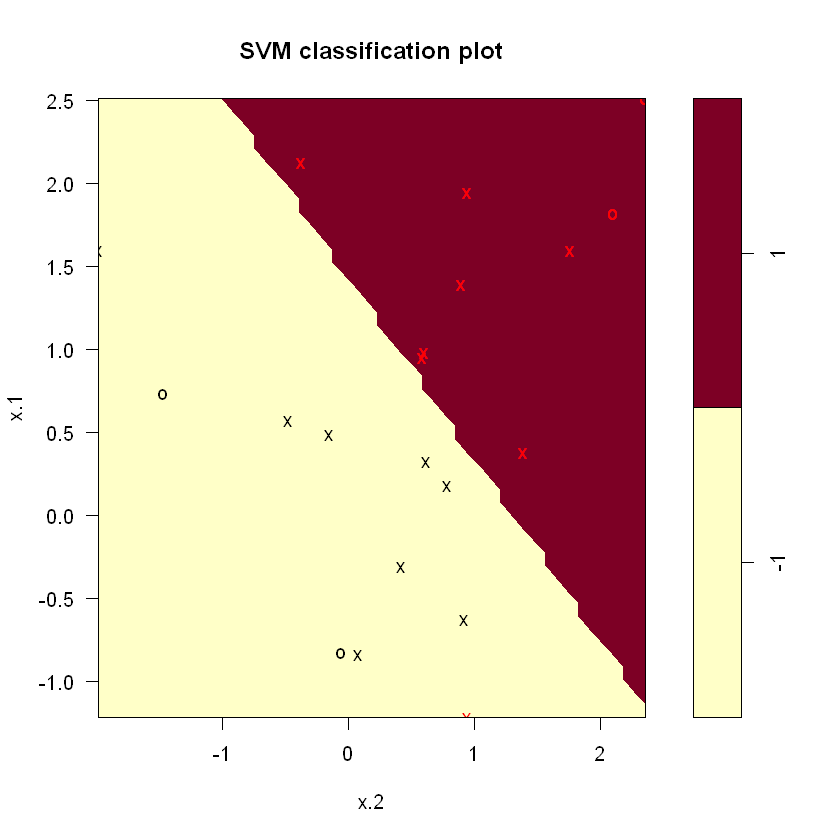

In [11]:
plot(svmfit, dat)

In [13]:
set.seed(1)
tune.out = tune(svm, y ~ ., data = dat, kernel = 'linear', ranges = list(cost = c(.001, .01, .1, 1, 5, 10, 100)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.05 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.55  0.4377975
2 1e-02  0.55  0.4377975
3 1e-01  0.05  0.1581139
4 1e+00  0.15  0.2415229
5 5e+00  0.15  0.2415229
6 1e+01  0.15  0.2415229
7 1e+02  0.15  0.2415229


In [14]:
bestmod = tune.out$best.model
summary(bestmod)


Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




In [15]:
xtest = matrix(rnorm(20 * 2), ncol = 2)
ytest = sample(c(-1, 1), 20, rep = TRUE)
xtest[ytest == 1,] = xtest[ytest == 1,] + 1
testdat = data.frame(x = xtest, y = as.factor(ytest))
ypred = predict(bestmod, testdat)

In [16]:
table(ypred, testdat$y)

     
ypred -1 1
   -1  9 1
   1   2 8

In [17]:
svmfit = svm(y ~ ., data = dat, kernel = 'linear', cost = .01, scale = FALSE)
ypred = predict(svmfit, testdat)

In [18]:
table(ypred, testdat$y)

     
ypred -1  1
   -1 11  6
   1   0  3

In [19]:
x[y == 1,] = x[y == 1,] + .5

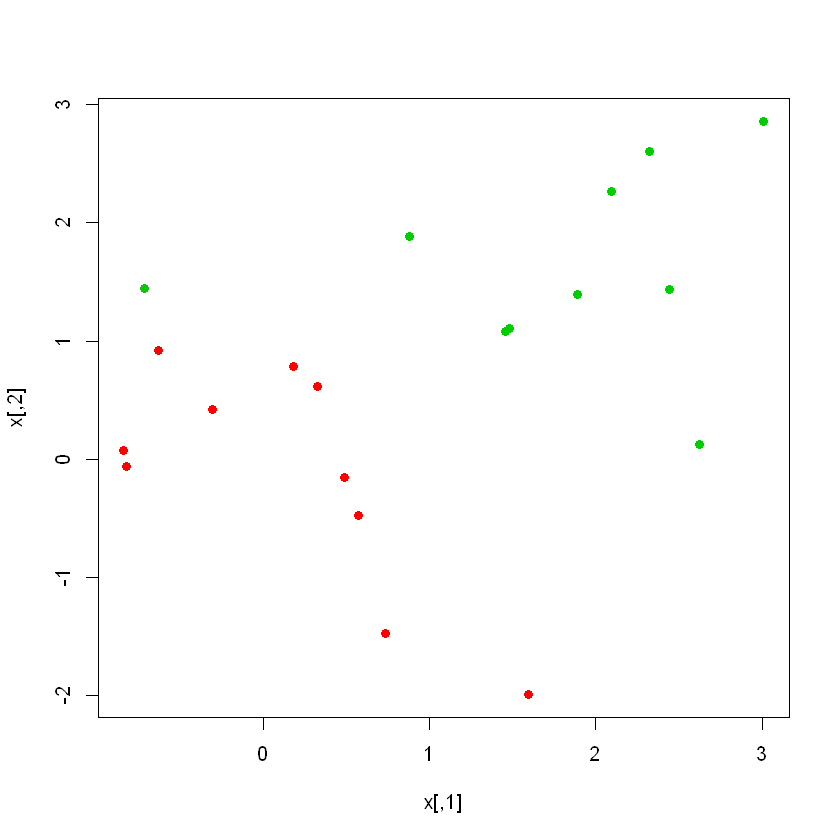

In [20]:
plot(x, col = (y + 5) / 2, pch = 19)

In [21]:
dat = data.frame(x = x, y = as.factor(y))
svmfit = svm(y ~ ., data = dat, kernel = 'linear', cost = 1e5)
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1e+05 

Number of Support Vectors:  3

 ( 1 2 )


Number of Classes:  2 

Levels: 
 -1 1




In [22]:
svmfit = svm(y ~ ., data = dat, kernel = 'linear', cost = 1)
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




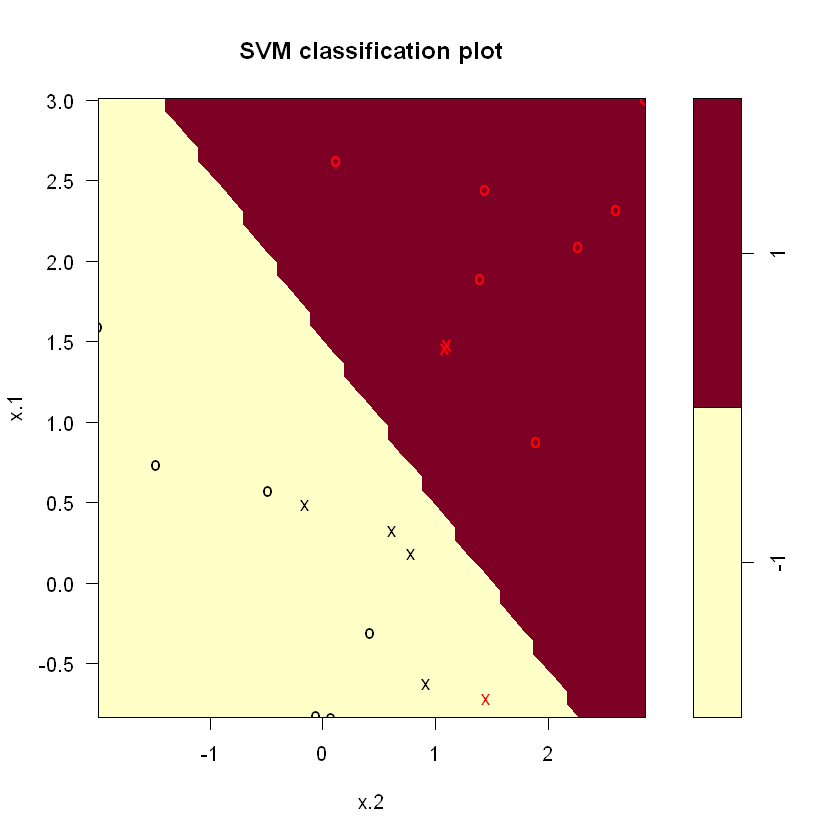

In [23]:
plot(svmfit, dat)

# Support Vector Machine

In [24]:
set.seed(1)
x = matrix(rnorm(200 * 2), ncol = 2)
x[1:100,] = x[1:100,] + 2
x[101:150,] = x[101:150,] - 2
y = c(rep(1, 150), rep(2, 50))
dat = data.frame(x = x, y = as.factor(y))

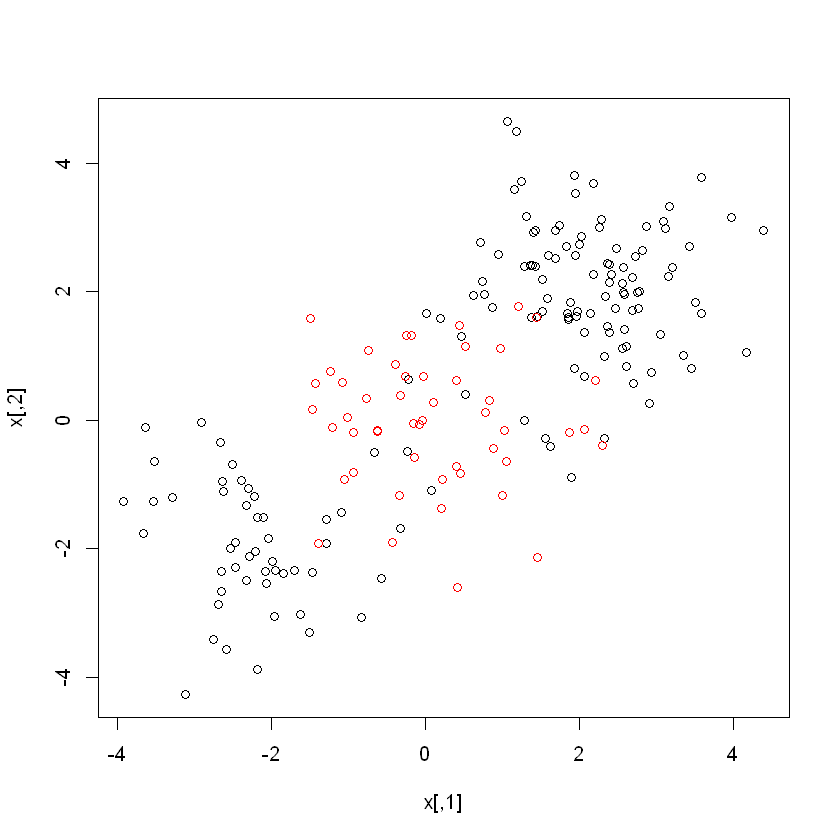

In [25]:
plot(x, col = y)

In [27]:
train = sample(200, 100)
svmfit = svm(y ~ ., data = dat[train,], kernel = 'radial', gamma = 1, cost = 1)

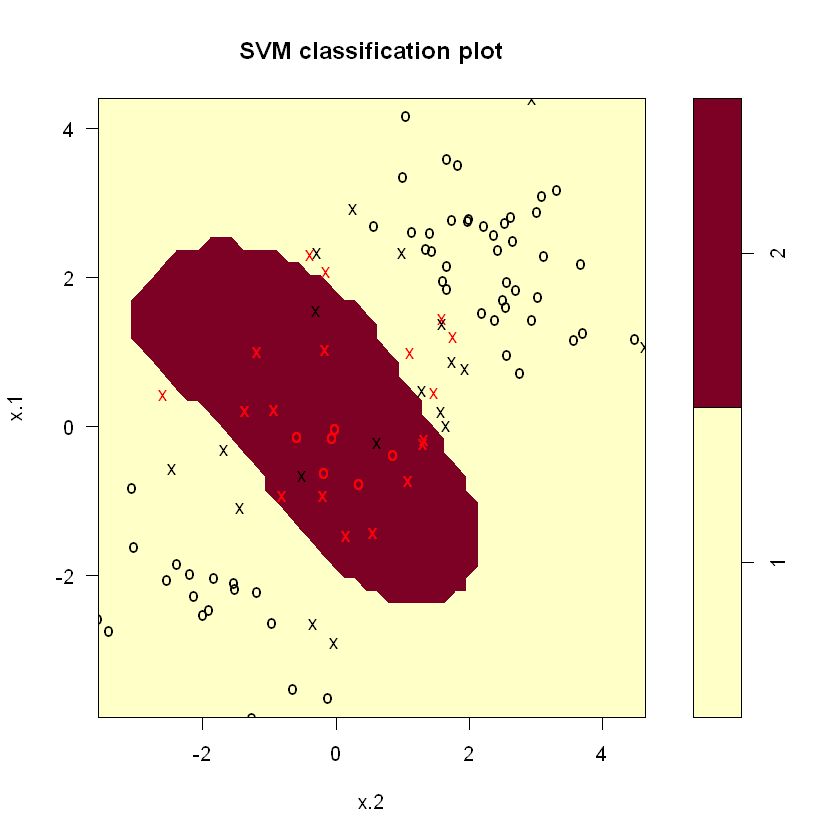

In [28]:
plot(svmfit, dat[train,])

In [29]:
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  37

 ( 18 19 )


Number of Classes:  2 

Levels: 
 1 2




In [30]:
svmfit = svm(y ~ ., data = dat[train,], kernel = 'radial', gamma = 1, cost = 1e5)

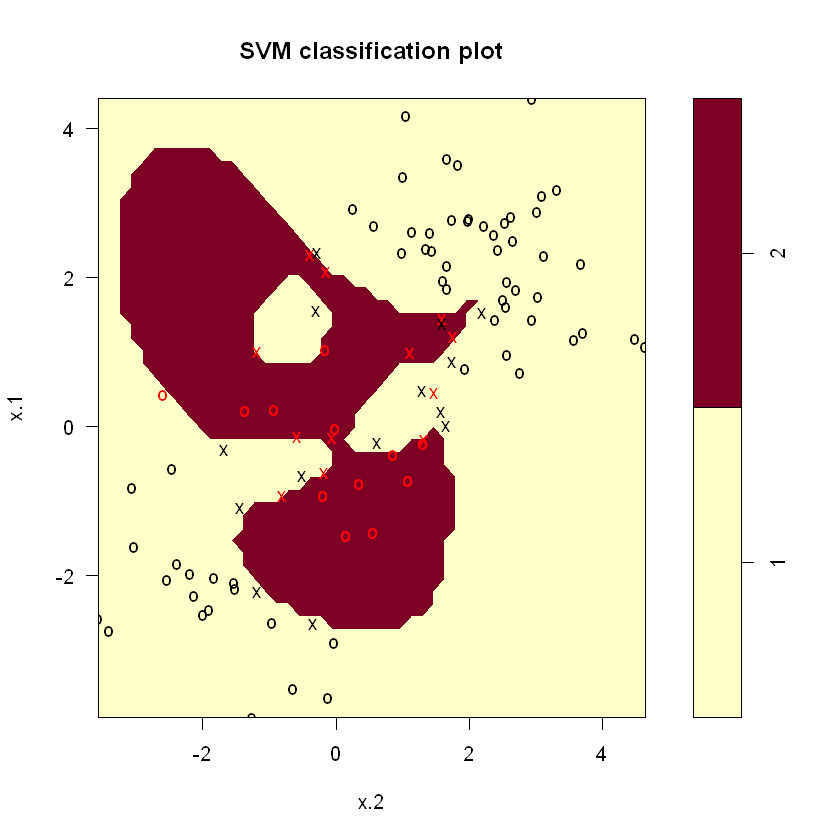

In [31]:
plot(svmfit, dat[train,])

In [32]:
set.seed(1)
tune.out = tune(svm, y ~ ., data = dat[train,], kernel = 'radial', 
                ranges = list(cost = c(.1, 1, 10, 100, 1000), gamma = c(.5, 1, 2, 3, 4)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1     2

- best performance: 0.13 

- Detailed performance results:
    cost gamma error dispersion
1  1e-01   0.5  0.24 0.20655911
2  1e+00   0.5  0.14 0.10749677
3  1e+01   0.5  0.15 0.09718253
4  1e+02   0.5  0.18 0.12292726
5  1e+03   0.5  0.17 0.14944341
6  1e-01   1.0  0.24 0.20655911
7  1e+00   1.0  0.14 0.09660918
8  1e+01   1.0  0.18 0.12292726
9  1e+02   1.0  0.19 0.16633300
10 1e+03   1.0  0.19 0.13703203
11 1e-01   2.0  0.24 0.20655911
12 1e+00   2.0  0.13 0.11595018
13 1e+01   2.0  0.19 0.17919573
14 1e+02   2.0  0.17 0.15670212
15 1e+03   2.0  0.20 0.14142136
16 1e-01   3.0  0.24 0.20655911
17 1e+00   3.0  0.15 0.10801234
18 1e+01   3.0  0.16 0.15776213
19 1e+02   3.0  0.19 0.12866839
20 1e+03   3.0  0.22 0.17511901
21 1e-01   4.0  0.24 0.20655911
22 1e+00   4.0  0.17 0.14944341
23 1e+01   4.0  0.16 0.15776213
24 1e+02   4.0  0.20 0.13333333
25 1e+03   4.0  0.21 0

In [33]:
table(dat[-train, 'y'], predict(tune.out$best.model, newdata = dat[-train, ]))

   
     1  2
  1 68  6
  2  5 21

# ROC Curves

In [38]:
set.seed(1)
x = matrix(rnorm(200 * 2), ncol = 2)
x[1:100, ] = x[1:100, ] + 2
x[101:150, ] = x[101:150, ] - 2
y = c(rep(1, 150), rep(2, 50))
dat = data.frame(x = x, y = as.factor(y))
train = sample(200, 100)

In [39]:
rocplot = function(pred, truth, ...) {
  predob = prediction(pred, truth)
  perf = performance(predob, 'tpr', 'fpr')
  plot(perf, ...)
}

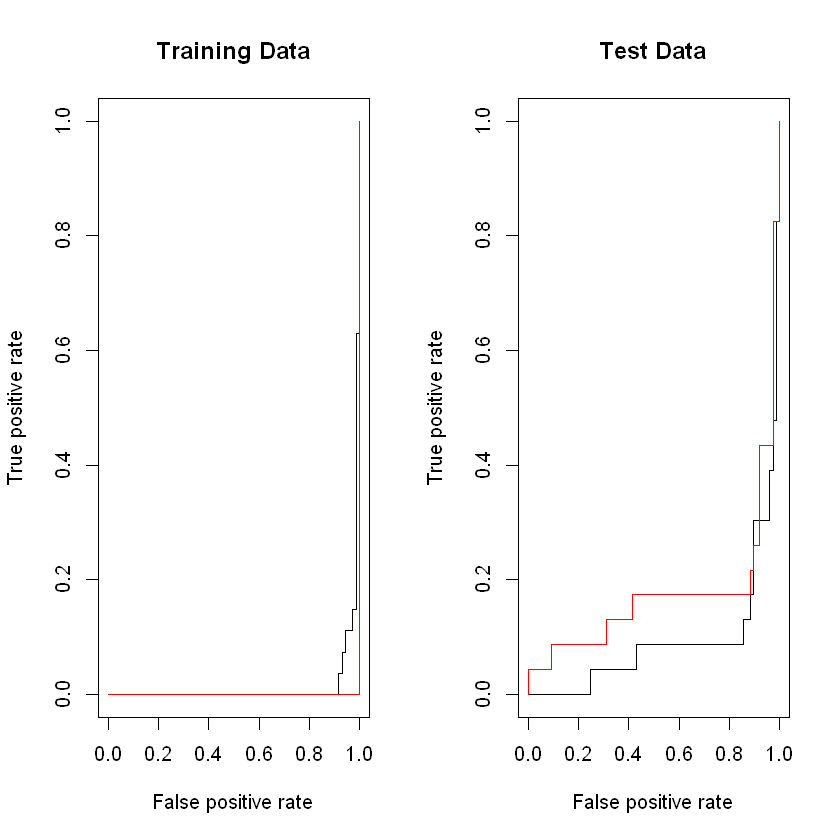

In [49]:
par(mfrow = c(1, 2))

svmfit.opt = svm(y ~ ., data = dat[train, ], kernel = 'radial', gamma = 2, cost = 1, decision.values = TRUE)
fitted = attributes(predict(svmfit.opt, dat[train, ], decision.values = TRUE))$decision.values

rocplot(fitted, dat[train, 'y'], main = 'Training Data')

svmfit.flex = svm(y ~ ., data = dat[train, ], kernel = 'radial', gamma = 50, cost = 1, decision.values = TRUE)
fitted = attributes(predict(svmfit.flex, dat[train, ], decision.values = TRUE))$decision.values

rocplot(fitted, dat[train, 'y'], add = TRUE, col = 'red')

fitted = attributes(predict(svmfit.opt, dat[-train, ], decision.values =
                              TRUE))$decision.values
rocplot(fitted, dat[-train, 'y'], main = 'Test Data')
fitted = attributes(predict(svmfit.flex, dat[-train, ], decision.values =
                              TRUE))$decision.values
rocplot(fitted, dat[-train, 'y'], add = TRUE, col = 'red')

# SVM with Multiple Classes

In [50]:
x = rbind(x, matrix(rnorm(50 * 2), ncol = 2))
y = c(y, rep(0, 50))
x[y == 0, 2] = x[y == 0, 2] + 2
dat = data.frame(x = x, y = as.factor(y))

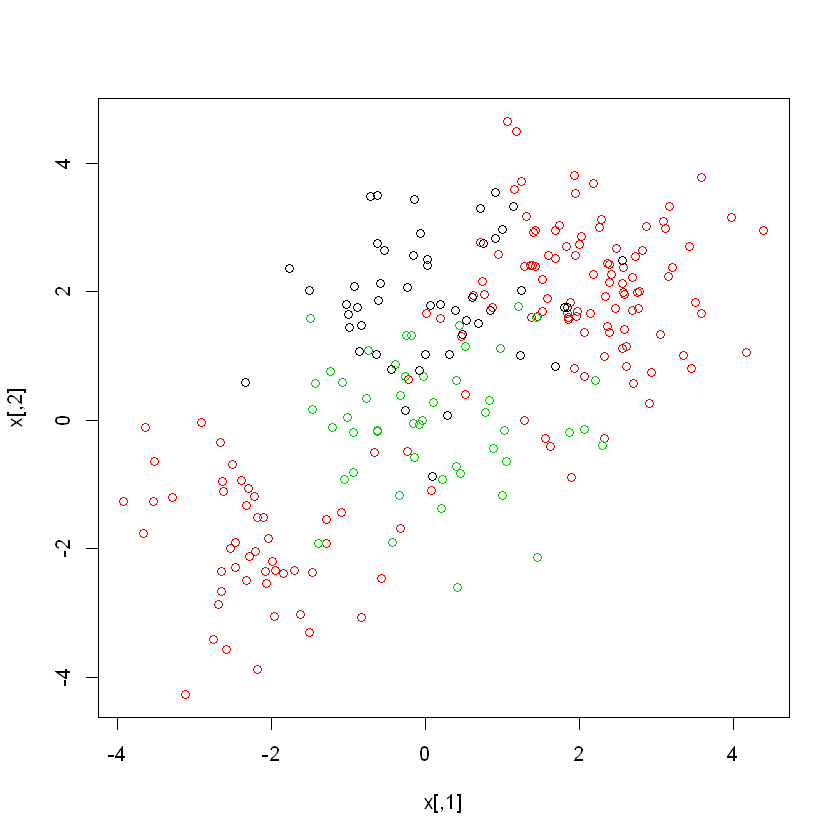

In [51]:
par(mfrow = c(1, 1))
plot(x, col = (y + 1))

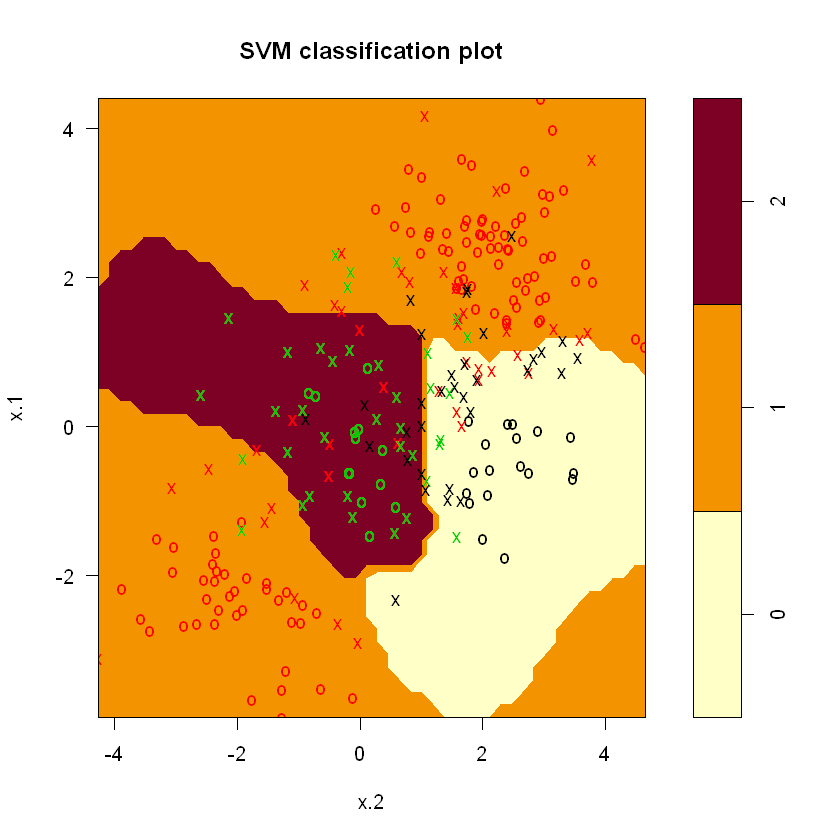

In [52]:
svmfit = svm(y ~ ., data = dat, kernel = 'radial', cost = 10, gamma = 1)
plot(svmfit, dat)

# Application to Gene Expression Data

In [55]:
dat = data.frame(x = Khan$xtrain, y = as.factor(Khan$ytrain))
out = svm(y ~ ., data = dat, kernel = 'linear', cost = 10)

In [56]:
summary(out)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  58

 ( 20 20 11 7 )


Number of Classes:  4 

Levels: 
 1 2 3 4




In [57]:
table(out$fitted, dat$y)

   
     1  2  3  4
  1  8  0  0  0
  2  0 23  0  0
  3  0  0 12  0
  4  0  0  0 20

In [58]:
dat.te = data.frame(x = Khan$xtest, y = as.factor(Khan$ytest))
pred.te = predict(out, newdata = dat.te)
table(pred.te, dat.te$y)

       
pred.te 1 2 3 4
      1 3 0 0 0
      2 0 6 2 0
      3 0 0 4 0
      4 0 0 0 5